In [1]:
# Clone repo and install dependencies
%%capture
!git clone https://github.com/shahineb/demo-bc3-emulator.git
%cd demo-bc3-emulator
!pip install equinox diffrax healpy xarray

In [9]:
from tqdm.notebook import tqdm
import utils

n_samples = 2  # Number of samples each emulator call generates (more takes longer to compile, <10 recommended)
n_steps = 20   # Number of denoising steps (more steps is better but slower, >20 recommended)

# Compile and load emulator (takes ~1min)
emulator = utils.make_emulator(n_samples=n_samples, n_steps=n_steps)

In [10]:
# Specify GMST and month at which we emulate
ΔT = 1  # 1K anomaly wrt pre-industrial
month = 3  # March

# Generate samples
n_members = 20
samples = []
for seed in tqdm(range(n_members // n_samples)):
  sample = emulator(ΔT, month, seed)
  samples.append(sample)

  0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
# Wrap into an xarray to manipulate
emulated_ds = utils.wrap_as_xarray(samples)
emulated_ds

<xarray.Dataset> Size: 6MB
Dimensions:  (member: 20, lat: 96, lon: 192)
Coordinates:
  * member   (member) int32 80B 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * lat      (lat) float32 384B -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Data variables:
    tas      (member, lat, lon) float32 1MB ...
    pr       (member, lat, lon) float32 1MB ...
    hurs     (member, lat, lon) float32 1MB ...
    sfcWind  (member, lat, lon) float32 1MB ...

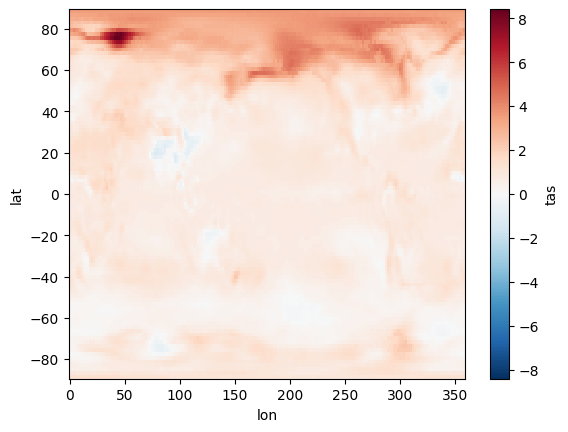

In [5]:
# Do your plots
emulated_ds['tas'].mean('member').plot()

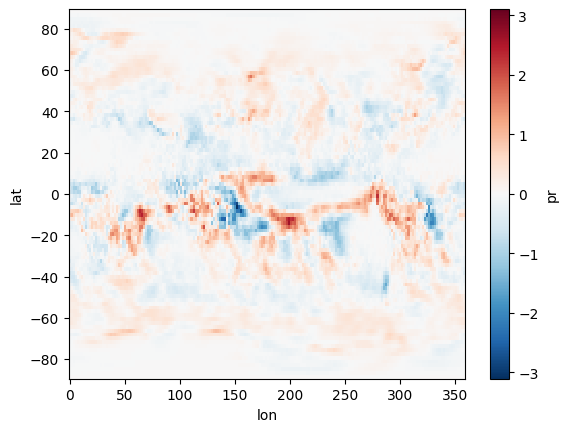

In [6]:
emulated_ds['pr'].mean('member').plot()

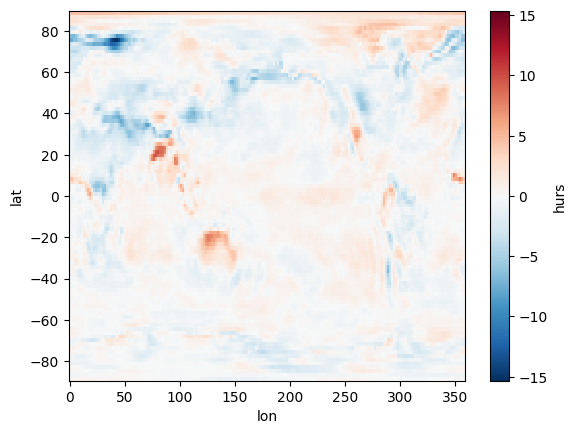

In [7]:
emulated_ds['hurs'].mean('member').plot()

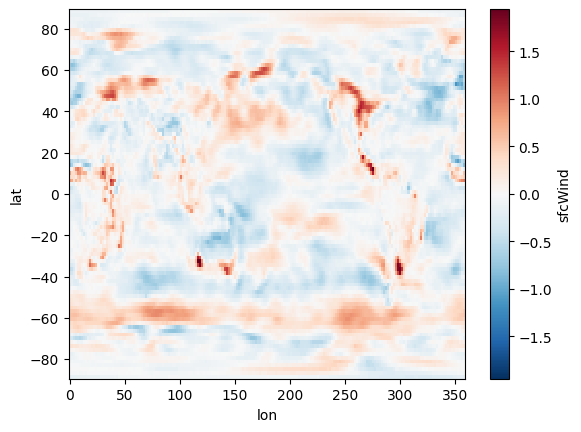

In [8]:
emulated_ds['sfcWind'].mean('member').plot()